# IMDB Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading in the dataset
data = pd.read_csv('imdb_top_1000.csv')
data.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [7]:
#Checking the number of rows and columns
data.shape

(1000, 16)

In [8]:
#Checking the data types of each column
data.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [3]:
#Checking for duplicate row
data[data.duplicated()]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


<AxesSubplot:>

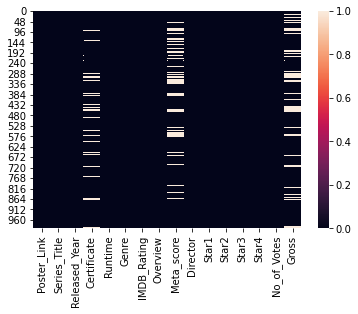

In [10]:
#Visualising null values
sns.heatmap(data.isnull())

In [17]:
#Cutting out the string commas in the gross value
data['Gross'] = data['Gross'].replace({',':''}, regex=True)
#Replacing null values with 0s
data['Gross'] = data['Gross'].replace(np.nan, 0)
#Casting the gross values as integers
data['Gross'] = data['Gross'].astype(int)

In [18]:
data.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross              int32
dtype: object

In [21]:
#Making a new dataframe by sorting it in descending order of number of votes
top_voted = data.sort_values(['No_of_Votes'], ascending = False)

In [86]:
top_voted[['Series_Title','No_of_Votes']][:7]

,Series_Title,No_of_Votes
0,The Shawshank Redemption,2343110
2,The Dark Knight,2303232
8,Inception,2067042
9,Fight Club,1854740
6,Pulp Fiction,1826188
11,Forrest Gump,1809221
14,The Matrix,1676426


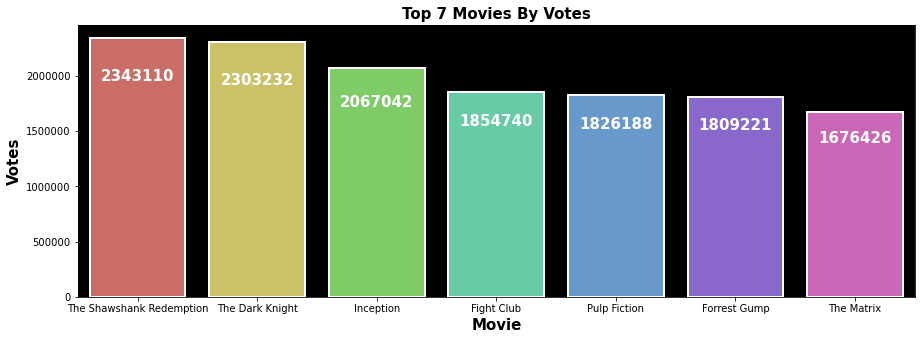

In [93]:
#Creating a barplot of the top 7 movies by votes in descending order
fig, ax = plt.subplots(figsize=(15,5))
ax.set(facecolor='black')
sns.barplot(x=top_voted['Series_Title'][:7], y=top_voted['No_of_Votes'][:7], palette='hls', edgecolor='white', linewidth=2)
plt.title('Top 7 Movies By Votes', fontweight='bold', fontsize=15)
plt.xlabel('Movie', fontweight='bold',fontsize='15')
plt.ylabel('Votes', fontweight='bold',fontsize='15')

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 1.2
    value = '{:.0f}'.format(p.get_height())
    ax.text(x, y, value, ha="center", color='white', fontweight='bold', fontsize='15')

plt.show()

In [88]:
#Making a new dataframe by sorting it in descending order of gross value
top_gross = data.sort_values(['Gross'], ascending=False)

In [89]:
top_gross[['Series_Title','Gross']][:7]

,Series_Title,Gross
477,Star Wars: Episode VII - The Force Awakens,936662225
59,Avengers: Endgame,858373000
623,Avatar,760507625
60,Avengers: Infinity War,678815482
652,Titanic,659325379
357,The Avengers,623279547
891,Incredibles 2,608581744


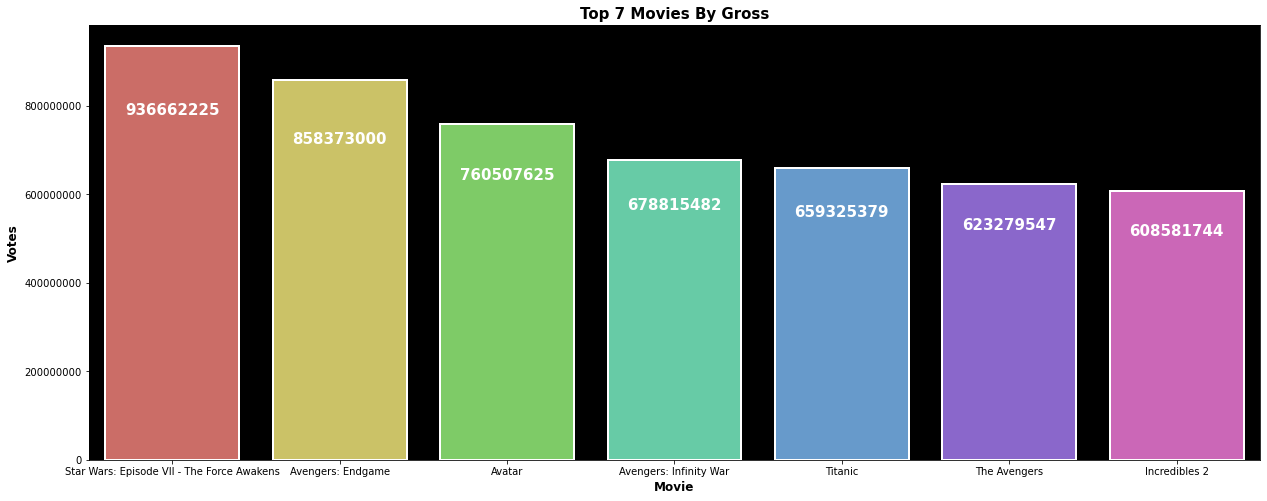

In [172]:
#Creating a barplot of the top 7 movies by gross in descending order
fig, ax = plt.subplots(figsize=(21,8))
ax.set(facecolor='black')
sns.barplot(x=top_gross['Series_Title'][:7], y=top_gross['Gross'][:7], palette='hls', edgecolor='white', linewidth=2)
plt.title('Top 7 Movies By Gross', fontweight='bold',fontsize='15')
plt.xlabel('Movie', fontweight='bold',fontsize='12')
plt.ylabel('Votes', fontweight='bold',fontsize='12')

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 1.2
    value = '{:.0f}'.format(p.get_height())
    ax.text(x, y, value,  ha='center', color='white', fontweight='bold', fontsize=15)
    
plt.show()

In [7]:
#Create a dataset of total votes per director
top_gross_dir = data.groupby(['Director'])['No_of_Votes'].sum().reset_index()
top_gross_dir.columns = ['Director','Cumulative Movie Votes']
top_gross_dir

,Director,Cumulative Movie Votes
0,Aamir Khan,168895
1,Aaron Sorkin,89896
2,Abdellatif Kechiche,138741
3,Abhishek Chaubey,27175
4,Abhishek Kapoor,32628
...,...,...
543,Zack Snyder,1233675
544,Zaza Urushadze,40382
545,Zoya Akhtar,99813
546,Çagan Irmak,78925


In [8]:
#Create a dataset of the top 7 directors
top_7_rated_dir = top_gross_dir.sort_values(by = 'Cumulative Movie Votes', ascending=False).head(7).reset_index().drop('index', axis=1)
top_7_rated_dir

,Director,Cumulative Movie Votes
0,Christopher Nolan,11578345
1,Quentin Tarantino,8123208
2,Steven Spielberg,7817166
3,David Fincher,6607859
4,Martin Scorsese,6513530
5,Peter Jackson,6148579
6,James Cameron,4613107


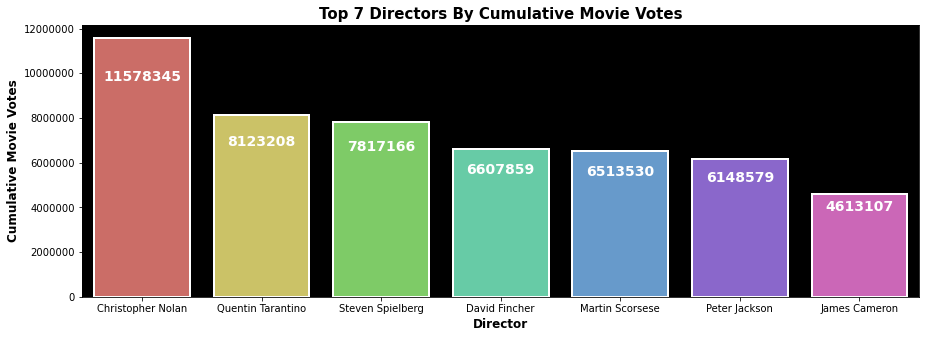

In [9]:
#Creating a barplot of top 7 directors by gross
fig, ax = plt.subplots(figsize=(15,5))
ax.set(facecolor='black')
sns.barplot(x=top_7_rated_dir['Director'], y=top_7_rated_dir['Cumulative Movie Votes'], palette='hls', edgecolor='white', linewidth=2)
plt.title('Top 7 Directors By Cumulative Movie Votes', fontweight='bold',fontsize='15')
plt.xlabel('Director', fontweight='bold',fontsize='12')
plt.ylabel('Cumulative Movie Votes', fontweight='bold',fontsize='12')

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 1.2
    value = '{:.0f}'.format(p.get_height())
    ax.text(x, y, value, ha='center', color='white', fontweight='bold',fontsize=14)

plt.show()

In [118]:
data.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [149]:
data['Released_Year']

0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
995    1961
996    1956
997    1953
998    1944
999    1935
Name: Released_Year, Length: 1000, dtype: object

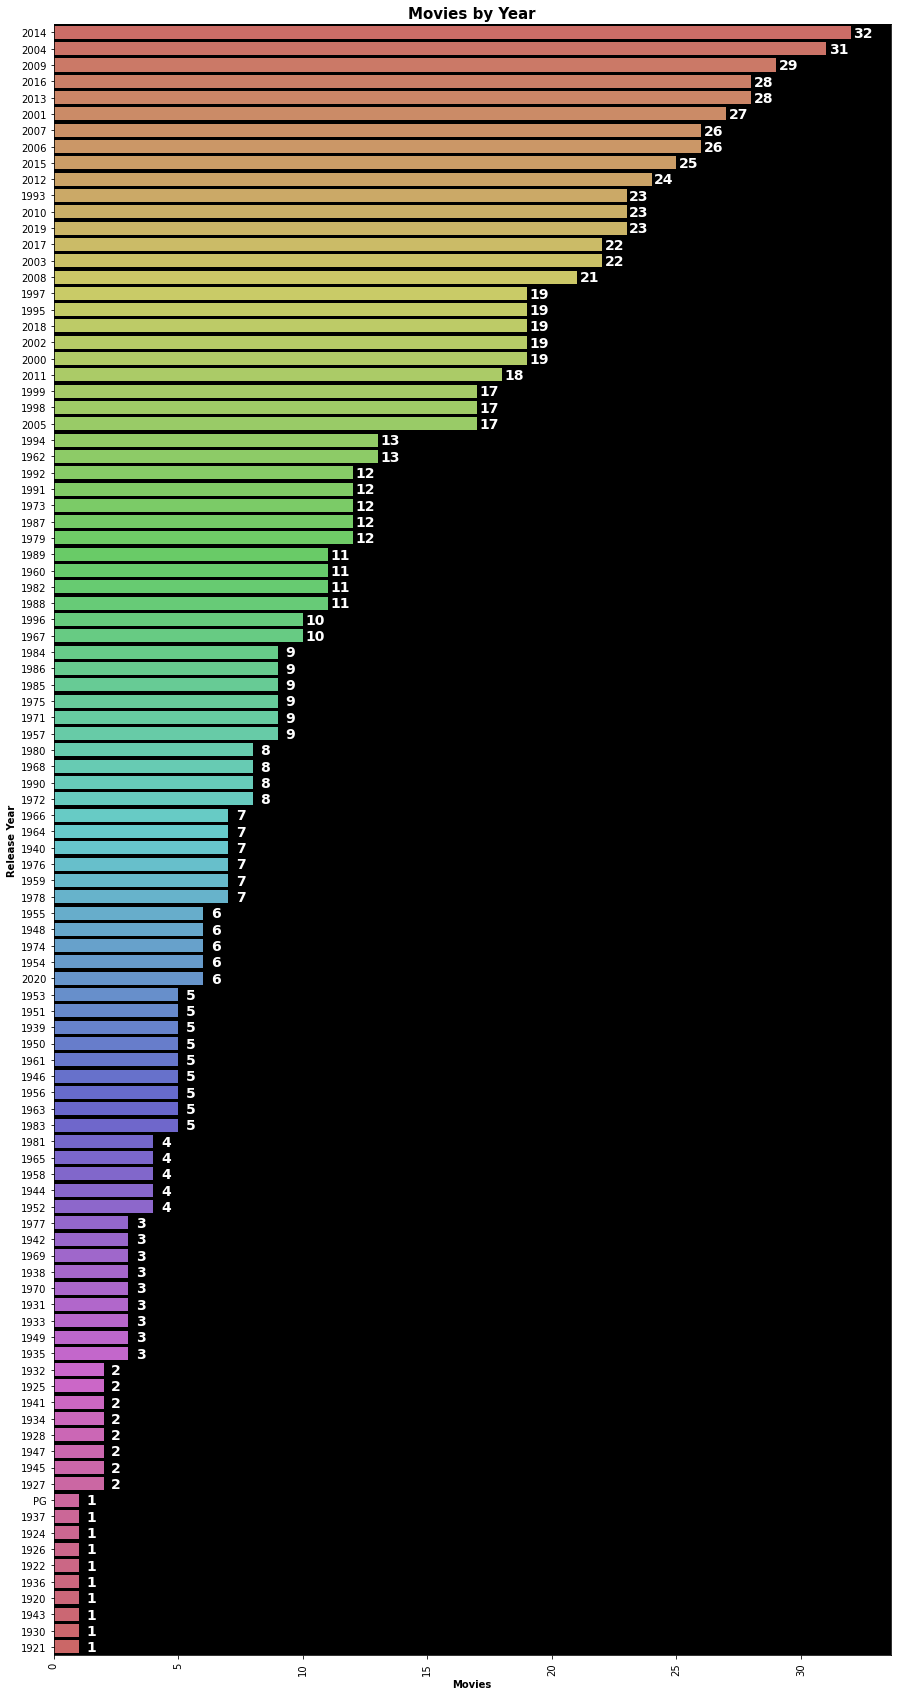

In [146]:
fig, ax = plt.subplots(figsize=(15,30))
ax.set(facecolor='black')
sns.countplot(y=data['Released_Year'], order = data['Released_Year'].value_counts().index, palette='hls')
plt.xticks(rotation=90)
plt.xlabel('Movies', fontsize=10, fontweight='bold')
plt.ylabel('Release Year', fontsize=10, fontweight='bold')
plt.title('Movies by Year', fontsize=15, fontweight='bold')

for p in ax.patches:
    x = p.get_x() + p.get_width() + 0.5
    y = p.get_y() + p.get_height() / 1.2
    value = '{:.0f}'.format(p.get_width())
    ax.text(x, y, value, ha='center', color='white', fontweight='bold',fontsize=14)

plt.show()

In [155]:
data[data['Series_Title'].str.contains('Iron Man')][['Poster_Link','Director', 'Series_Title']]

,Poster_Link,Director,Series_Title
502,https://m.media-amazon.com/images/M/MV5BMTczNT...,Jon Favreau,Iron Man


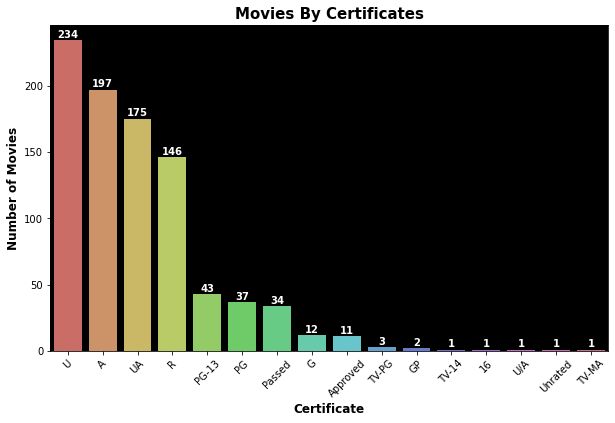

In [174]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set(facecolor='black')
sns.countplot(x=data['Certificate'], order=data['Certificate'].value_counts().index, palette='hls')
plt.title('Movies By Certificates', fontsize=15, fontweight='bold')
plt.xlabel('Certificate', fontsize=12, fontweight='bold')
plt.ylabel('Number of Movies', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 2
    value = '{:.0f}'.format(p.get_height())
    ax.text(x, y, value, ha='center', color='white', fontweight='bold')
    
plt.show()

In [175]:
data['Director'].value_counts().head(10)

Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Martin Scorsese      10
Akira Kurosawa       10
Stanley Kubrick       9
Woody Allen           9
Billy Wilder          9
Quentin Tarantino     8
Clint Eastwood        8
Name: Director, dtype: int64

In [176]:
data[(data['Director']=='Alfred Hitchcock')]['Series_Title']

49                   Psycho
81              Rear Window
118      North by Northwest
119                 Vertigo
187       Dial M for Murder
312                 Rebecca
450                    Rope
556    Strangers on a Train
559               Notorious
712       Shadow of a Doubt
714       The Lady Vanishes
862               The Birds
998                Lifeboat
999            The 39 Steps
Name: Series_Title, dtype: object

In [177]:
data.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [184]:
data['Star1']

0            Tim Robbins
1          Marlon Brando
2         Christian Bale
3              Al Pacino
4            Henry Fonda
             ...        
995       Audrey Hepburn
996     Elizabeth Taylor
997       Burt Lancaster
998    Tallulah Bankhead
999         Robert Donat
Name: Star1, Length: 1000, dtype: object

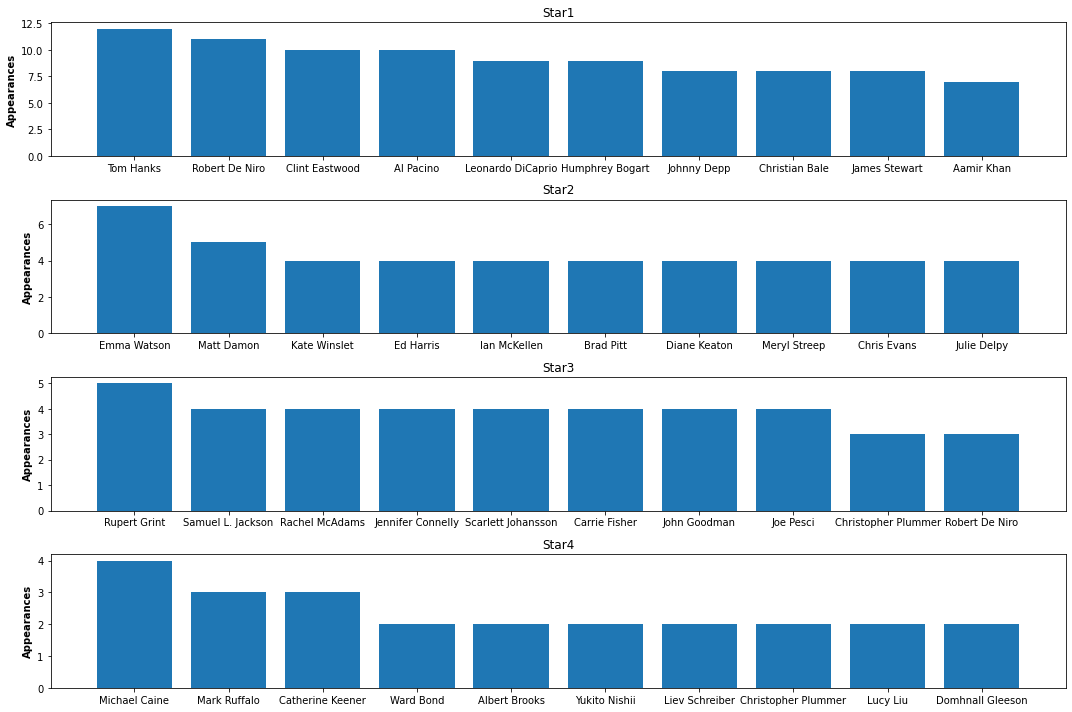

In [186]:
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(15,10))
ax=0
for x in stars:
    axs[ax].bar(data[x].value_counts()[:10].index,data[x].value_counts()[:10])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

In [14]:
genre=[]
for x in data['Genre']:
    for y in x.split(','):
        genre.append(y.strip().lower())

In [15]:
from collections import Counter
count = Counter(genre)
count

Counter({'drama': 724,
         'crime': 209,
         'action': 189,
         'adventure': 196,
         'biography': 109,
         'history': 56,
         'sci-fi': 67,
         'romance': 125,
         'western': 20,
         'fantasy': 66,
         'comedy': 233,
         'thriller': 137,
         'animation': 82,
         'family': 56,
         'war': 51,
         'mystery': 99,
         'music': 35,
         'horror': 32,
         'musical': 17,
         'film-noir': 19,
         'sport': 19})

In [16]:
count = count.most_common()

In [17]:
count[:10]

[('drama', 724),
 ('comedy', 233),
 ('crime', 209),
 ('adventure', 196),
 ('action', 189),
 ('thriller', 137),
 ('romance', 125),
 ('biography', 109),
 ('mystery', 99),
 ('animation', 82)]

In [18]:
top_genre = pd.DataFrame(count, columns=['Genre','Count'])
top_genre.head(10)

,Genre,Count
0,drama,724
1,comedy,233
2,crime,209
3,adventure,196
4,action,189
5,thriller,137
6,romance,125
7,biography,109
8,mystery,99
9,animation,82


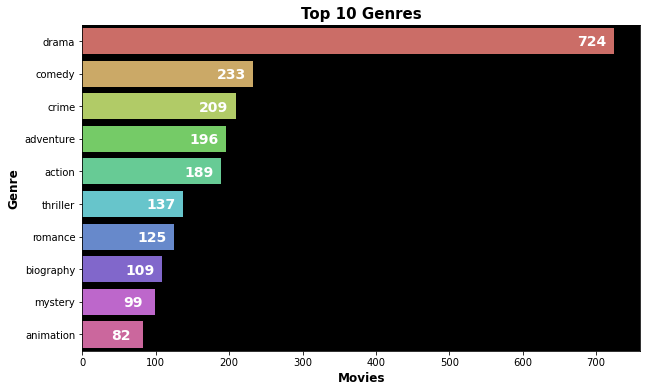

In [49]:
fig, ax=plt.subplots(figsize=(10,6))
ax.set(facecolor='black')
sns.barplot(x=top_genre['Count'][:10], y=top_genre['Genre'][:10], palette='hls')
plt.title('Top 10 Genres', fontsize=15, fontweight='bold')
plt.xlabel('Movies', fontsize=12, fontweight='bold')
plt.ylabel('Genre', fontsize=12, fontweight='bold')

for p in ax.patches:
    x = p.get_x() + p.get_width() -30
    y = p.get_y() + p.get_height() - 0.25
    value = '{:.0f}'.format(p.get_width())
    ax.text(x, y, value, ha='center', color='white', fontweight='bold',fontsize=14)

plt.show()

In [215]:
data.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [50]:
top_rated_movie = data.groupby(['Series_Title'])['IMDB_Rating'].sum().reset_index()
top_rated_movie.columns = ['Movie','Rating']
top_rated_movie = top_rated_movie.sort_values(by = 'Rating', ascending=False).reset_index().drop('index', axis=1)
top_rated_movie.drop([0,0], inplace=True)


In [51]:
top_rated_movie[:10]

,Movie,Rating
1,The Shawshank Redemption,9.3
2,The Godfather,9.2
3,12 Angry Men,9.0
4,The Godfather: Part II,9.0
5,The Dark Knight,9.0
6,Schindler's List,8.9
7,The Lord of the Rings: The Return of the King,8.9
8,Pulp Fiction,8.9
9,Fight Club,8.8
10,Inception,8.8


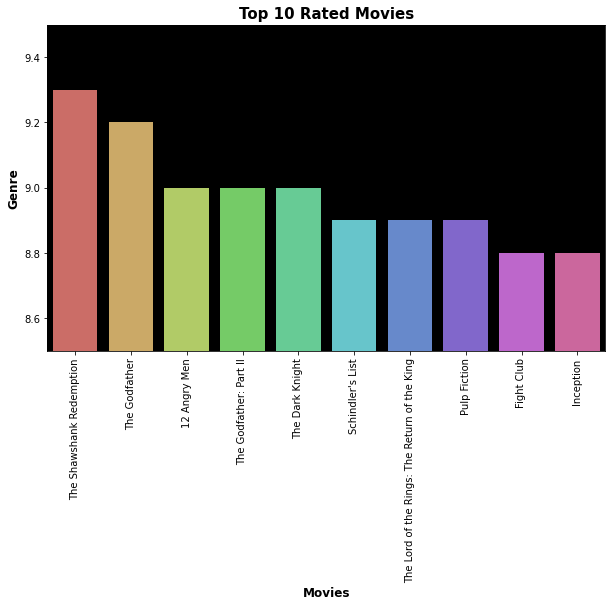

In [58]:
fig, ax=plt.subplots(figsize=(10,6))
ax.set(facecolor='black')
sns.barplot(x=top_rated_movie['Movie'][:10], y=top_rated_movie['Rating'][:10], palette='hls')
plt.title('Top 10 Rated Movies', fontsize=15, fontweight='bold')
plt.xlabel('Movies', fontsize=12, fontweight='bold')
plt.ylabel('Genre', fontsize=12, fontweight='bold')
plt.xticks(rotation=90)
plt.ylim([8.5, 9.5])
plt.show()